In [25]:
import pandas as pd
import numpy as np
import statistics as st

In [ ]:
chennai_df = pd.read_csv('Chennai.csv')
chennai_df['dataset'] = 'Chennai'

hyderabad_df = pd.read_csv('Hyderabad.csv')
hyderabad_df['dataset'] = 'Hydebarad'

kolkata_df = pd.read_csv('Kolkata.csv')
kolkata_df['dataset'] = 'Kolkata'

In [ ]:
chennai_df.head()

In [ ]:
hyderabad_df.head()

In [ ]:
kolkata_df.head()

In [4]:
df = pd.concat([chennai_df, hyderabad_df, kolkata_df])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29940 entries, 0 to 9899
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seller_type    29456 non-null  object 
 1   bedroom        29457 non-null  float64
 2   layout_type    29457 non-null  object 
 3   property_type  29940 non-null  object 
 4   locality       29457 non-null  object 
 5   price          29457 non-null  object 
 6   area           29457 non-null  float64
 7   furnish_type   29457 non-null  object 
 8   bathroom       28945 non-null  object 
 9   dataset        29940 non-null  object 
dtypes: float64(2), object(8)
memory usage: 2.5+ MB


In [15]:
df

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,dataset
0,OWNER,3.0,BHK,Apartment,Ambattur,"17,000",1570.0,Semi-Furnished,2,Chennai
1,OWNER,2.0,BHK,Apartment,Kelambakkam,"16,000",1402.0,Semi-Furnished,2,Chennai
2,OWNER,2.0,BHK,Apartment,Adyar,"20,000",800.0,Semi-Furnished,2,Chennai
3,OWNER,2.0,BHK,Apartment,Sembakkam,"14,000",1180.0,Unfurnished,2,Chennai
4,OWNER,1.0,BHK,Independent House,Mogappair,"7,000",400.0,Unfurnished,1,Chennai
...,...,...,...,...,...,...,...,...,...,...
9893,OWNER,2.0,BHK,Apartment,Netaji Nagar,"13,500",838.0,Semi-Furnished,2,Kolkata
9894,OWNER,3.0,BHK,Apartment,Rajarhat,"15,000",1100.0,Semi-Furnished,2,Kolkata
9896,OWNER,2.0,BHK,Apartment,Baguihati,"12,000",925.0,Semi-Furnished,2,Kolkata
9898,OWNER,3.0,BHK,Independent Floor,Shibpur,"7,500",960.0,Unfurnished,1,Kolkata


In [7]:
df['property_type'] = df['property_type'].astype(str)

In [10]:
df['bathroom'] = df['bathroom'].str.replace('bathrooms', '')

### Apaga todos os registros que tem valores nulos

In [9]:
def drop_null_rows(columns):
    for column in columns:
        df.drop(df[df[column].isnull()].index.tolist(), axis=0, inplace=True)

In [11]:
drop_null_rows(list(df.columns))

### Análise numérica de estatísticas descritivas

In [19]:
df

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,dataset
0,OWNER,3.0,BHK,Apartment,Ambattur,"17,000",1570.0,Semi-Furnished,2,Chennai
1,OWNER,2.0,BHK,Apartment,Kelambakkam,"16,000",1402.0,Semi-Furnished,2,Chennai
2,OWNER,2.0,BHK,Apartment,Adyar,"20,000",800.0,Semi-Furnished,2,Chennai
3,OWNER,2.0,BHK,Apartment,Sembakkam,"14,000",1180.0,Unfurnished,2,Chennai
4,OWNER,1.0,BHK,Independent House,Mogappair,"7,000",400.0,Unfurnished,1,Chennai
...,...,...,...,...,...,...,...,...,...,...
9893,OWNER,2.0,BHK,Apartment,Netaji Nagar,"13,500",838.0,Semi-Furnished,2,Kolkata
9894,OWNER,3.0,BHK,Apartment,Rajarhat,"15,000",1100.0,Semi-Furnished,2,Kolkata
9896,OWNER,2.0,BHK,Apartment,Baguihati,"12,000",925.0,Semi-Furnished,2,Kolkata
9898,OWNER,3.0,BHK,Independent Floor,Shibpur,"7,500",960.0,Unfurnished,1,Kolkata


In [37]:
def analise_desc_num(coluna):
    global df
    
    dct_retorno = {}    
    s_coluna = df[coluna].value_counts()
    
    media = st.mean(s_coluna)
    moda = st.mode(s_coluna)
    mediana = st.median(s_coluna)
    desvio_padrao = st.stdev(s_coluna)
    quartis = st.quantiles(s_coluna)
    
    dct_retorno['MEDIA'] = media
    dct_retorno['MODA'] = moda
    dct_retorno['MEDIANA'] = mediana
    dct_retorno['DESVIO PADRAO'] = desvio_padrao
    dct_retorno['QUARTIS'] = quartis    
    
    return dct_retorno
    

#### Coluna - 'seller_type'

{'MEDIA': 9022.666666666666, 'MODA': 15036, 'MEDIANA': 11906, 'DESVIO PADRAO': 7862.07563772655, 'QUARTIS': [126.0, 11906.0, 15036.0]}


<AxesSubplot: >

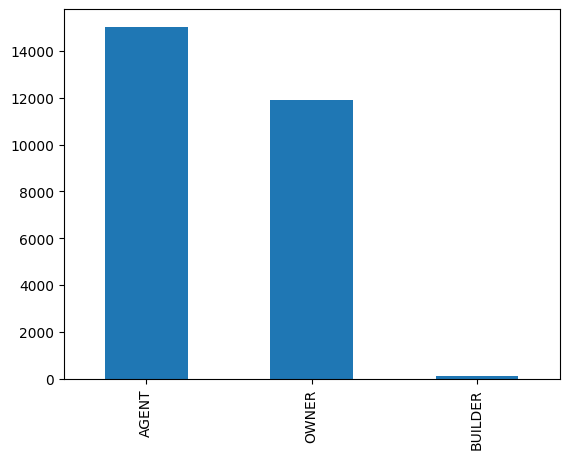

In [38]:
coluna_analise = 'seller_type'

statis = analise_desc_num(coluna_analise)


print(statis)
df[coluna_analise].value_counts().plot(kind='bar')

#### Coluna - 'layout_type'

{'MEDIA': 13534, 'MODA': 25851, 'MEDIANA': 13534.0, 'DESVIO PADRAO': 17418.868447749413, 'QUARTIS': [-4941.5, 13534.0, 32009.5]}


<AxesSubplot: >

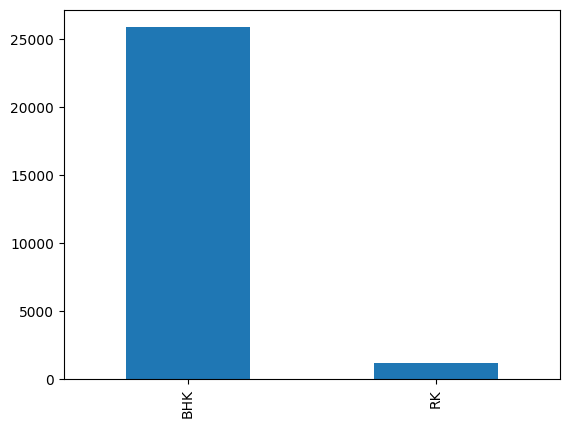

In [39]:
coluna_analise = 'layout_type'

statis = analise_desc_num(coluna_analise)


print(statis)
df[coluna_analise].value_counts().plot(kind='bar')

#### Coluna - 'property_type'

{'MEDIA': 4511.333333333333, 'MODA': 18288, 'MEDIANA': 2199.5, 'DESVIO PADRAO': 6924.300041640792, 'QUARTIS': [316.5, 2199.5, 7535.25]}


<AxesSubplot: >

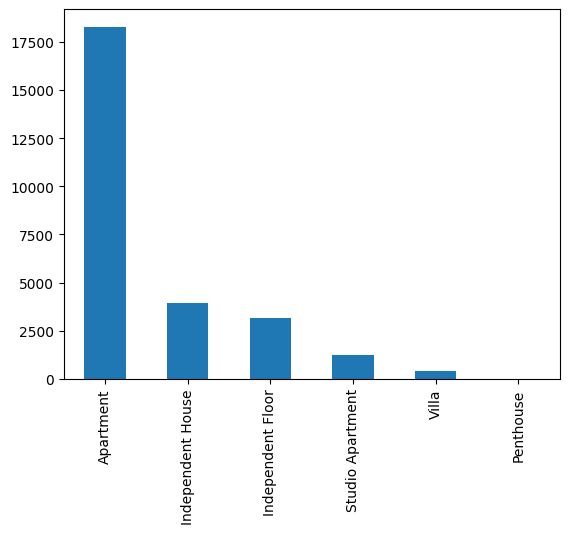

In [41]:
coluna_analise = 'property_type'

statis = analise_desc_num(coluna_analise)


print(statis)
df[coluna_analise].value_counts().plot(kind='bar')